## Build a simple 2d CNN

In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 38kB/s 
     |████████████████████████████████| 501kB 39.7MB/s 
     |████████████████████████████████| 4.3MB 49.8MB/s 


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPool2D, Dense, Flatten
import tensorflow as tf

In [4]:
print(tf.__version__)

2.0.0-rc0


In [0]:
from tensorflow.keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


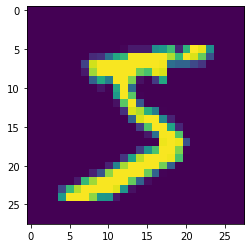

In [7]:
plt.imshow(X_train[0])

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_test.shape

(10000, 28, 28)

In [11]:
X_train.max()

255

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0

In [0]:
X_train= X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [15]:
X_train[0].shape

(28, 28, 1)

In [0]:
input_shape = X_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
history = model.fit(X_train,y_train,batch_size=128,epochs=10, verbose =1 ,validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.2498 - accuracy: 0.9247 - val_loss: 0.0520 - val_accuracy: 0.9831
Epoch 2/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0883 - accuracy: 0.9737 - val_loss: 0.0416 - val_accuracy: 0.9858
Epoch 3/10
60000/60000 [==============================] - 168s 3ms/sample - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.0344 - val_accuracy: 0.9887
Epoch 4/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0313 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0456 - accuracy: 0.9860 - val_loss: 0.0316 - val_accuracy: 0.9903
Epoch 6/10
60000/60000 [==============================] - 162s 3ms/sample - loss: 0.0421 - accuracy: 0.9867 - val_loss: 0.0284 - val_accuracy: 0.9912
Epoch 7/10
60000/60000 [==========================

In [30]:
model.evaluate(X_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.027758981231448616, 0.9915]

In [0]:
def plot_learningCurve(history, epochs):
  # Plot training and validation accuracy values
  epoch_range=range(1,epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

  # Plot training and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'],loc='upper left')
  plt.show()

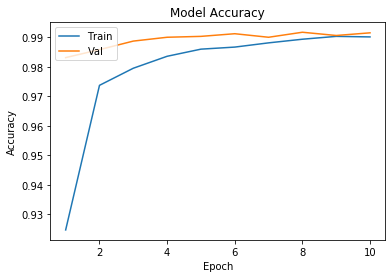

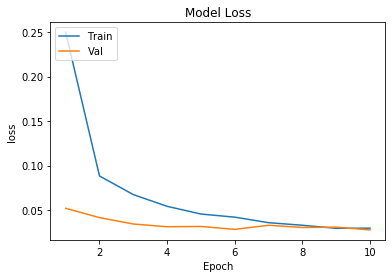

In [33]:
plot_learningCurve(history,10)